In [31]:
from numpy import *
from matplotlib import pyplot as plt

In [32]:
from dolo import *

In [37]:
filename =  '../models/rbc_taxes.yaml'

In [38]:
model = yaml_import(filename)

The model defined in `rbc_taxes.yaml` is the `rbc` model, with an agregate tax `g` that is proportional to income. 

In [39]:
model.calibration

{'states': array([1.        , 9.35497829, 0.        ]),
 'controls': array([0.23387446, 0.33      ]),
 'exogenous': array([0.]),
 'parameters': array([0.99      , 1.        , 1.        , 8.04277482, 0.025     ,
        0.33      , 0.8       , 1.        ]),
 'auxiliaries': array([0.03510101, 2.02026956, 0.99505814, 0.76118369])}

In [40]:
model.residuals()

{'transition': array([0., 0., 0.]),
 'arbitrage': array([ 0.0000000e+00, -8.8817842e-16])}

We want to compute the adjustment of the economy when this tax, goes back progressively from 10% to 0%, over 10 periods.

In [41]:
exo_g = linspace(0.1,0,10) # this is a vector of size 10
exo_g = atleast_2d(exo_g).T # the solver expects a 1x10 vector
print(exo_g.shape)

(10, 1)


In [42]:
exo_g

array([[0.1       ],
       [0.08888889],
       [0.07777778],
       [0.06666667],
       [0.05555556],
       [0.04444444],
       [0.03333333],
       [0.02222222],
       [0.01111111],
       [0.        ]])

In [44]:
# Let's solve for the optimal adjustment by assuming that the
# economy returns to steady-state after T=50 periods.
from dolo.algos.perfect_foresight import deterministic_solve
sim = deterministic_solve(model, shocks=exo_g, T=50)
display(sim) # it returns a timeseries object

	> 1 | 0.03282645604591261 | 0
	> 2 | 0.0013560969381939403 | 0
	> 3 | 2.8228642349192867e-06 | 0
	> 4 | 1.2459810960763207e-11 | 0
> System was solved after iteration 4. Residual=1.2459810960763207e-11


,z,k,g,i,n,rk,w,y,c,e_g
0,1.0,9.917135,8.888889e-02,0.247928,0.349830,0.035101,2.020270,1.054853,0.718036,0.088889
1,1.0,9.917135,7.777778e-02,0.163656,0.330581,0.033795,2.058356,1.015603,0.774170,0.077778
2,1.0,9.832863,6.666667e-02,0.171925,0.330163,0.033960,2.053426,1.011887,0.773295,0.066667
3,1.0,9.758967,5.555556e-02,0.180518,0.329789,0.034106,2.049085,1.008607,0.772533,0.055556
4,1.0,9.695510,4.444444e-02,0.189468,0.329469,0.034233,2.045334,1.005782,0.771870,0.044444
5,1.0,9.642591,3.333333e-02,0.198813,0.329208,0.034341,2.042177,1.003435,0.771289,0.033333
6,1.0,9.600339,2.222222e-02,0.208590,0.329014,0.034428,2.039616,1.001587,0.770775,0.022222
7,1.0,9.568920,1.111111e-02,0.218837,0.328895,0.034496,2.037655,1.000261,0.770313,0.011111
8,1.0,9.548534,-2.025942e-23,0.229594,0.328858,0.034542,2.036297,0.999481,0.769887,0.000000
9,1.0,9.539415,-3.669557e-23,0.229792,0.328910,0.034568,2.035548,0.999273,0.769481,0.000000


In [45]:
model

Model:
        ------
        name: "taxes"
        type: "dtcc"
        file: "../models/rbc_taxes.yaml

Equations:
----------

transition
 1  : 0.0000 : z(0) == ((1) - (rho)) * (zbar) + (rho) * (z(-(1)))
 2  : 0.0000 : k(0) == ((1) - (delta)) * (k(-(1))) + i(-(1))
 3  : 0.0000 : g(0) == e_g(0)

arbitrage
 1  : 0.0000 : (1) - (((beta) * (((c(0)) / (c(1))) ** (sigma))) * ((1) - (delta) + rk(1)))
 2  : 0.0000 : (((chi) * ((n(0)) ** (eta))) * ((c(0)) ** (sigma))) - (w(0))

definitions
 1  : rk = alpha*z*(n/k)**(1-alpha)
 2  : w = (1-alpha)*z*(k/n)**(alpha)
 3  : y = z*k**alpha*n**(1-alpha)
 4  : c = k*rk + w*n - i - g

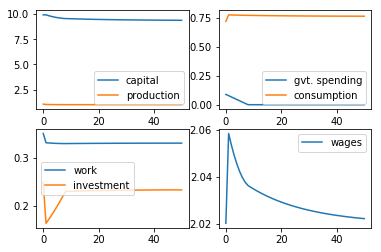

In [47]:
plt.plot(figsize=(10,10))
plt.subplot(221)
plt.plot(sim['k'], label='capital')
plt.plot(sim['y'], label='production')
plt.legend()
plt.subplot(222)
plt.plot(sim['g'], label='gvt. spending')
plt.plot(sim['c'], label='consumption')
plt.legend()
plt.subplot(223)
plt.plot(sim['n'], label='work')
plt.plot(sim['i'], label='investment')
plt.legend()
plt.subplot(224)
plt.plot(sim['w'], label='wages')
plt.legend()